In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [4]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.shape

(8790, 10)

In [6]:
# Handling missing values
df.dropna(subset=['title', 'release_year'], inplace=True)  # Remove rows with missing title or year
df['director'].fillna("Unknown", inplace=True)  # Replace missing directors with "Unknown"
df['country'].fillna(df['country'].mode()[0], inplace=True)  # Fill missing country with most common value

In [7]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [8]:
df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [9]:
# Basic Analysis
print("Total movies and TV shows:", df['type'].value_counts())

Total movies and TV shows: type
Movie      6126
TV Show    2664
Name: count, dtype: int64


***Visualizations***

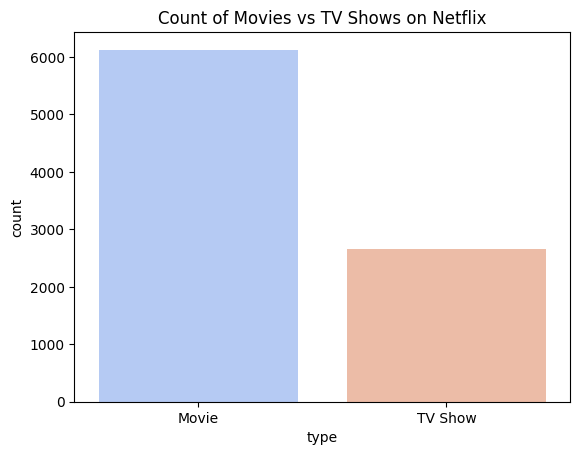

In [10]:
# 1. Count of Movies vs TV Shows
sns.countplot(x='type', data=df, palette="coolwarm")
plt.title("Count of Movies vs TV Shows on Netflix")

plt.savefig("Count of Movies vs TV Shows on Netflix.png", dpi = 1500 , bbox_inches='tight')

plt.show()

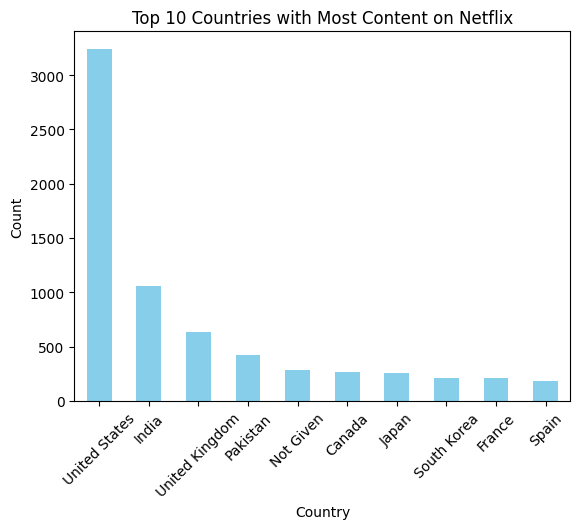

In [29]:
# 2. Top 10 Countries with Most Content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.savefig("Top 10 Countries with Most Content on Netflix.png", dpi = 1500 , bbox_inches='tight')

plt.show()

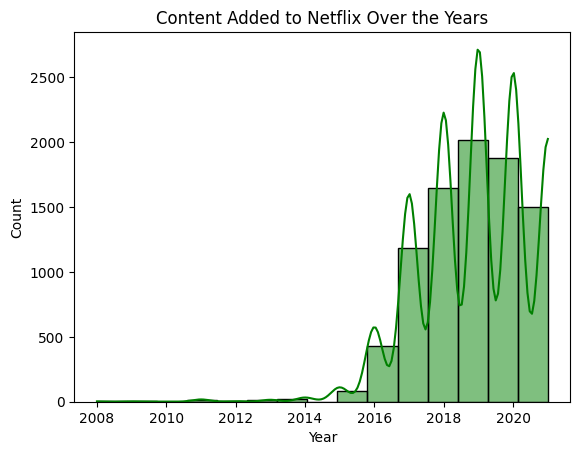

In [31]:
# 3. Content Added Over the Years
df['year_added'] = df['date_added'].dt.year
sns.histplot(df['year_added'].dropna(), bins=15, kde=True, color='green')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")

plt.savefig("Content Added to Netflix Over the Years.png", dpi = 1500 , bbox_inches='tight')

plt.show()

In [13]:
# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [14]:
# Convert 'duration' column to numeric (for movies only)
df['duration'] = df['duration'].str.extract('(\d+)')  # Extract numbers only
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Convert to numeric

In [15]:
df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",2021,9


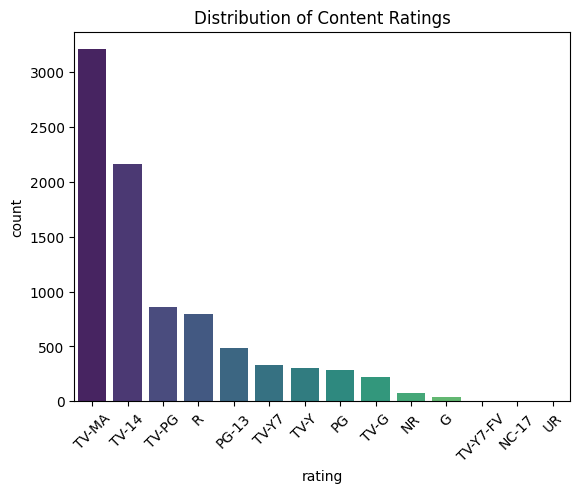

In [32]:
# Most Common Ratings
sns.countplot(order=df['rating'].value_counts().index,x=df['rating'], palette="viridis")
plt.title("Distribution of Content Ratings")
plt.xticks(rotation=45)

plt.savefig("Distribution of Content Ratings.png", dpi = 1500 , bbox_inches='tight')

plt.show()


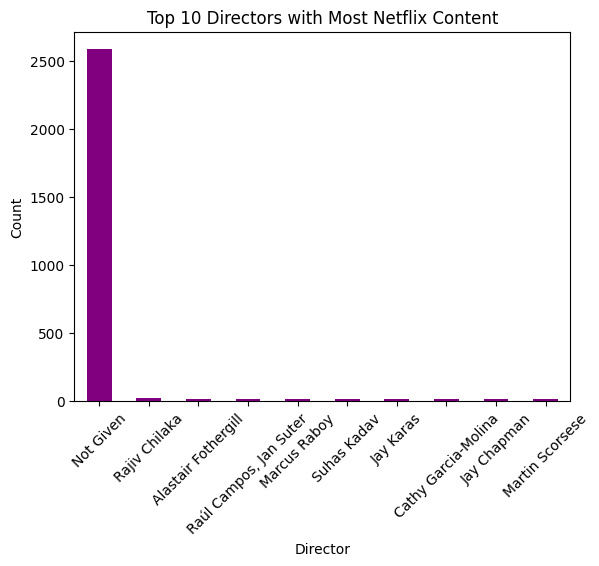

In [33]:
# Top 10 Directors with Most Content
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='purple')
plt.title("Top 10 Directors with Most Netflix Content")
plt.xlabel("Director")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.savefig("Top 10 Directors with Most Netflix Content.png", dpi = 1500 , bbox_inches='tight')

plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [19]:
le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating'])  # Convert to numbers

In [20]:
df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,rating_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,9,4
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021,9,8
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",2021,9,8


In [21]:
# Select Features and Target
features = ['release_year', 'year_added', 'duration', 'rating_encoded']
x = df[features]
y = df['type'].map({'Movie': 0, 'TV Show': 1})  # Convert to 0 and 1

In [22]:
# Split the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
model.score(x_test,y_test)*100

99.7155858930603

In [25]:
model.score(x_train,y_train)*100

99.98577929465301

In [26]:
# Make Predictions
y_pred = model.predict(x_test)

In [27]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       0.99      1.00      1.00       520

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



In [34]:
importances = model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


          Feature  Importance
2        duration    0.938800
3  rating_encoded    0.045837
0    release_year    0.014285
1      year_added    0.001078


In [35]:
from sklearn.metrics import confusion_matrix

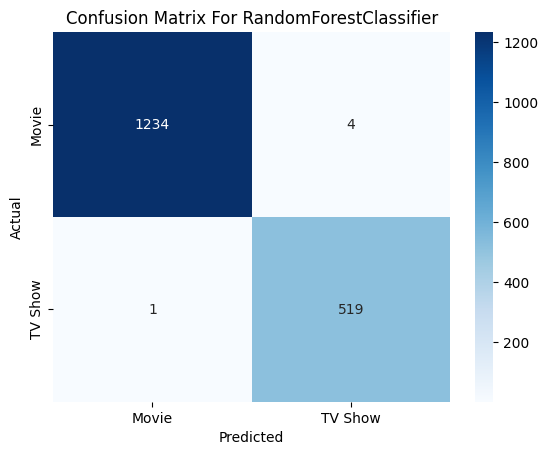

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For RandomForestClassifier")

plt.savefig("Confusion Matrix.png", dpi = 1500 , bbox_inches='tight')

plt.show()


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [39]:
log_model.score(x_test,y_test)*100

99.60182025028442

In [40]:
log_pred = log_model.predict(x_test)

In [41]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_pred):.2f}")

Logistic Regression Accuracy: 1.00


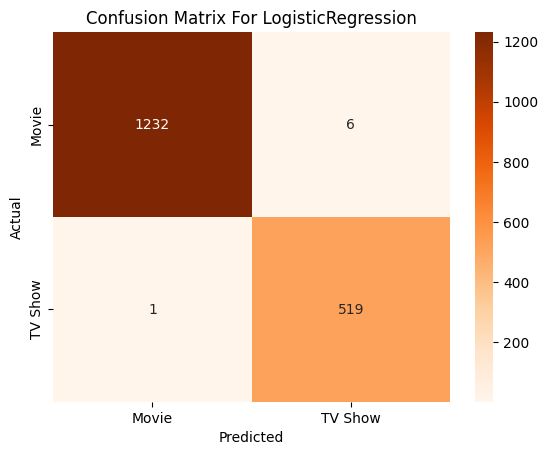

In [44]:
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For LogisticRegression")

plt.savefig("Confusion Matrix_1.png", dpi = 1500 , bbox_inches='tight')

plt.show()